# Getting top 5 scorers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
plt.rcParams['figure.figsize'] = 10, 5
plt.rcParams['figure.dpi'] = 100

In [3]:
df= pd.read_excel("Python_Mock_Test(1-280).xlsx")

In [4]:
df.head()

,ID,Start time,Completion time,Email,Name,Total points,Quiz feedback,Please fill your full name?,Points - Please fill your full name?,Feedback - Please fill your full name?,...,"Feedback - What should be replace in blank space to get output as 33?\n\nnames1 = ['Amir', 'Bear', 'Charlton', 'Daman']\nnames2 = names1\nnames3 = names1\n\nnames2[0] = 'Alice'\nnames3[1] = 'Bob'\n\nsum = 0\nfor ls i...","Which should we write to get the output as NEWYORK or to access NEWYORK?\n\ndata = {1: {\n ""id"" : 390669115,\n ""name"" : ""ProgramState"",\n ""dataTypeName"" : ""text"",\n ""descript...","Points - Which should we write to get the output as NEWYORK or to access NEWYORK?\n\ndata = {1: {\n ""id"" : 390669115,\n ""name"" : ""ProgramState"",\n ""dataTypeName"" : ""text"",\n ""descript...","Feedback - Which should we write to get the output as NEWYORK or to access NEWYORK?\n\ndata = {1: {\n ""id"" : 390669115,\n ""name"" : ""ProgramState"",\n ""dataTypeName"" : ""text"",\n ""descript...","What should be replaced in line 5 blank space to get the output as 1?\n\n1. myList = [1, 5, 5, 5, 5, 1]\n2. max = myList[0]\n3. indexOfMax = 0\n4. for i in range(1, len(myList)):\n5. if myList[i] __...","Points - What should be replaced in line 5 blank space to get the output as 1?\n\n1. myList = [1, 5, 5, 5, 5, 1]\n2. max = myList[0]\n3. indexOfMax = 0\n4. for i in range(1, len(myList)):\n5. if myList[i] __...","Feedback - What should be replaced in line 5 blank space to get the output as 1?\n\n1. myList = [1, 5, 5, 5, 5, 1]\n2. max = myList[0]\n3. indexOfMax = 0\n4. for i in range(1, len(myList)):\n5. if myList[i] __...",What should be replaced in blank space to get the output as \nOutput:\n 0\n 1\n 2\n\ni = 0\nwhile i < 5:\n print(i)\n i += 1\n if i == 3:\n ________\nelse:\n print(0),Points - What should be replaced in blank space to get the output as \nOutput:\n 0\n 1\n 2\n\ni = 0\nwhile i < 5:\n print(i)\n i += 1\n if i == 3:\n ________\nelse:\n print(0),Feedback - What should be replaced in blank space to get the output as \nOutput:\n 0\n 1\n 2\n\ni = 0\nwhile i < 5:\n print(i)\n i += 1\n if i == 3:\n ________\nelse:\n print(0)
0,1,2021-07-02 21:51:56,2021-07-02 21:52:13,anonymous,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
1,2,2021-07-03 14:13:47,2021-07-03 14:18:16,anonymous,NaN,9,NaN,Vishal thakur,NaN,NaN,...,NaN,New York,0,NaN,0,0,NaN,0,0,NaN
2,3,2021-07-03 14:18:11,2021-07-03 14:23:05,anonymous,NaN,14,NaN,Nikita prajapati,NaN,NaN,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
3,4,2021-07-03 14:19:02,2021-07-03 14:23:40,anonymous,NaN,14,NaN,ansh,NaN,NaN,...,NaN,8,0,NaN,8,0,NaN,7,0,NaN
4,5,2021-07-03 14:14:44,2021-07-03 14:26:08,anonymous,NaN,9,NaN,Krishna garare,NaN,NaN,...,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN


In [5]:
for i in df.columns:
    if i.startswith("Feedback"):
        df=df.drop(columns=[i],axis=1)

        
df = df.drop(columns=["Email","Name", "Points - Please choose your batch?","Points - Please fill your branch?","Points - Please fill your email?","Points - Please fill your full name?"], axis=1)

***
**Removed the unnecessary columns**

***

In [6]:
df=df.dropna(how="all")

***
**Removed all the rows which contain all null values**

***

In [7]:
df[:2]

,ID,Start time,Completion time,Total points,Quiz feedback,Please fill your full name?,Please fill your email?,Please choose your batch?,Please fill your branch?,Which data type among the following is immutable,...,"What should be the value of a so that the output becomes as follows:\n\na = ?\nprint(a)\n\noutput:\n(""CheckCheckCheck"")","Points - What should be the value of a so that the output becomes as follows:\n\na = ?\nprint(a)\n\noutput:\n(""CheckCheckCheck"")","What should be replace in blank space to get output as 33?\n\nnames1 = ['Amir', 'Bear', 'Charlton', 'Daman']\nnames2 = names1\nnames3 = names1\n\nnames2[0] = 'Alice'\nnames3[1] = 'Bob'\n\nsum = 0\nfor ls i...","Points - What should be replace in blank space to get output as 33?\n\nnames1 = ['Amir', 'Bear', 'Charlton', 'Daman']\nnames2 = names1\nnames3 = names1\n\nnames2[0] = 'Alice'\nnames3[1] = 'Bob'\n\nsum = 0\nfor ls i...","Which should we write to get the output as NEWYORK or to access NEWYORK?\n\ndata = {1: {\n ""id"" : 390669115,\n ""name"" : ""ProgramState"",\n ""dataTypeName"" : ""text"",\n ""descript...","Points - Which should we write to get the output as NEWYORK or to access NEWYORK?\n\ndata = {1: {\n ""id"" : 390669115,\n ""name"" : ""ProgramState"",\n ""dataTypeName"" : ""text"",\n ""descript...","What should be replaced in line 5 blank space to get the output as 1?\n\n1. myList = [1, 5, 5, 5, 5, 1]\n2. max = myList[0]\n3. indexOfMax = 0\n4. for i in range(1, len(myList)):\n5. if myList[i] __...","Points - What should be replaced in line 5 blank space to get the output as 1?\n\n1. myList = [1, 5, 5, 5, 5, 1]\n2. max = myList[0]\n3. indexOfMax = 0\n4. for i in range(1, len(myList)):\n5. if myList[i] __...",What should be replaced in blank space to get the output as \nOutput:\n 0\n 1\n 2\n\ni = 0\nwhile i < 5:\n print(i)\n i += 1\n if i == 3:\n ________\nelse:\n print(0),Points - What should be replaced in blank space to get the output as \nOutput:\n 0\n 1\n 2\n\ni = 0\nwhile i < 5:\n print(i)\n i += 1\n if i == 3:\n ________\nelse:\n print(0)
0,1,2021-07-02 21:51:56,2021-07-02 21:52:13,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,0,NaN,0,NaN,0
1,2,2021-07-03 14:13:47,2021-07-03 14:18:16,9,NaN,Vishal thakur,vishalthakur850900@gmail.com,Batch 2,Mechanical engineering,List,...,* is not supported in tuple,0,elif else,NaN,New York,0,0,0,0,0


In [8]:
pd.set_option('display.max_columns', None)

In [9]:
ques=['ID','Start time', 'Completion time', 'Total points', 'Quiz feedback',
       'Please fill your full name?', 'Please fill your email?',
       'Please choose your batch?', 'Please fill your branch?']
for i in range(1, 32):
    ques.append(f"Q {i}")
    ques.append(f"Points {i}")
    

In [10]:
df.columns= ques

In [11]:
df.columns

Index(['ID', 'Start time', 'Completion time', 'Total points', 'Quiz feedback',
       'Please fill your full name?', 'Please fill your email?',
       'Please choose your batch?', 'Please fill your branch?', 'Q 1',
       'Points 1', 'Q 2', 'Points 2', 'Q 3', 'Points 3', 'Q 4', 'Points 4',
       'Q 5', 'Points 5', 'Q 6', 'Points 6', 'Q 7', 'Points 7', 'Q 8',
       'Points 8', 'Q 9', 'Points 9', 'Q 10', 'Points 10', 'Q 11', 'Points 11',
       'Q 12', 'Points 12', 'Q 13', 'Points 13', 'Q 14', 'Points 14', 'Q 15',
       'Points 15', 'Q 16', 'Points 16', 'Q 17', 'Points 17', 'Q 18',
       'Points 18', 'Q 19', 'Points 19', 'Q 20', 'Points 20', 'Q 21',
       'Points 21', 'Q 22', 'Points 22', 'Q 23', 'Points 23', 'Q 24',
       'Points 24', 'Q 25', 'Points 25', 'Q 26', 'Points 26', 'Q 27',
       'Points 27', 'Q 28', 'Points 28', 'Q 29', 'Points 29', 'Q 30',
       'Points 30', 'Q 31', 'Points 31'],
      dtype='object')

***
**Renaming the columns so that it would be easy to analyse**
***

In [12]:
df.head()

,ID,Start time,Completion time,Total points,Quiz feedback,Please fill your full name?,Please fill your email?,Please choose your batch?,Please fill your branch?,Q 1,Points 1,Q 2,Points 2,Q 3,Points 3,Q 4,Points 4,Q 5,Points 5,Q 6,Points 6,Q 7,Points 7,Q 8,Points 8,Q 9,Points 9,Q 10,Points 10,Q 11,Points 11,Q 12,Points 12,Q 13,Points 13,Q 14,Points 14,Q 15,Points 15,Q 16,Points 16,Q 17,Points 17,Q 18,Points 18,Q 19,Points 19,Q 20,Points 20,Q 21,Points 21,Q 22,Points 22,Q 23,Points 23,Q 24,Points 24,Q 25,Points 25,Q 26,Points 26,Q 27,Points 27,Q 28,Points 28,Q 29,Points 29,Q 30,Points 30,Q 31,Points 31
0,1,2021-07-02 21:51:56,2021-07-02 21:52:13,1,NaN,NaN,NaN,NaN,NaN,NaN,0,Static,0,64,0,1992.0,0,.python,0,Indentation,1,123x_;,0,"a, b, c = {""a"": ""b, ""c"": ""d"", ""d"": ""e""}",0,5,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,0,NaN,0,NaN,0
1,2,2021-07-03 14:13:47,2021-07-03 14:18:16,9,NaN,Vishal thakur,vishalthakur850900@gmail.com,Batch 2,Mechanical engineering,List,0,Dynamic,1,16,0,1972.0,0,.pyt,0,Brackets,0,_x;,0,"a, b, c = 1, 2, 3",0,5,0,error,2,12 10,0,3.0,0,0,0,rnpn ea,0,"for i in range(0,n)",0,indefinite,2,#requests,0,2,0,1,0,for 1:,0,"9, 10",0,1,0,1 Square,2,0,0,While,0,strip strip split indexing,2,* is not supported in tuple,0,elif else,NaN,New York,0,0,0,0,0
2,3,2021-07-03 14:18:11,2021-07-03 14:23:05,14,NaN,Nikita prajapati,Nikitap8912@gmail.com,Batch 2,Cs,Dictionary,0,Dynamic,1,32,0,1989.0,1,.pyt,0,Indentation,1,None of the above;,0,"a, b, c = {""a"": ""b, ""c"": ""d"", ""d"": ""e""}",0,10,0,1 2,0,12 10,0,4.5,0,Hello,0,rnpn ea,0,"for i in range(0,n):",2,indefinite,2,import requests,1,0,2,9,2,while 1:,2,"9, 10",0,3,0,"2 squares, at a separation of100 units, joined...",0,(200),0,While,0,split strip strip slicing,0,Tuple is immutable,0,elif else,NaN,NaN,0,NaN,0,NaN,0
3,4,2021-07-03 14:19:02,2021-07-03 14:23:40,14,NaN,ansh,ansh00@gmail.com,Batch 2,cs,Set,0,Static,0,64,0,1989.0,1,.p,0,Indentation,1,abc@123;,0,"a, b, c = ""hel""",0,10,0,error,2,12 10,0,4.5,0,8,0,"rnpn, ear",2,"for i in range(0,n):",2,definite,0,from requests,0,error,0,10,0,None of the above,0,"10, 10",0,3,0,1 Square,2,hn,0,None of the above,2,strip strip split indexing,2,Tuple is immutable,0,if else,NaN,8,0,8,0,7,0
4,5,2021-07-03 14:14:44,2021-07-03 14:26:08,9,NaN,Krishna garare,krishnagararekkg@gmail.com,Batch 3,CSE,List,0,Static,0,None of these,1,1991.0,0,NaN,0,Brackets,0,All of the above;,0,"a, b, c = {""a"": ""b, ""c"": ""d"", ""d"": ""e""}",0,12,2,infinite,0,10 12 'hello',0,4.0,0,NaN,0,rnpn ear,0,"for i in range(0,n)",0,indeterminate,0,import requests,1,1,0,10,0,while 1:,2,"10, 10",0,1,0,Error,0,NaN,0,Do while,0,strip,0,"(""Check"")*3",3,if else,NaN,NaN,0,NaN,0,NaN,0


In [13]:
for i in df.columns:
        if i.startswith("Points"):
            df[i].replace(np.nan,0)

***
**Replacing null values to zero in all the points table so that we can calculate the total points of all the students**

***


In [14]:
#15 question, 10,12, in this dataset it is Q 11
df.loc[:,"Points 11"] = 0

***
**In this question there was an issue the option for the correct answer was not present, so we have initialised the points for this question to be zero**

***


In [15]:
#32 question, if if, in this it is Q28
df.loc[:,"Points 28"] = 0
df1 = df["Q 28"] == "if if"
df.loc[df1,"Points 28"] = 3

***
**In this question the points  were not assigned to the correct answer**
***

In [16]:
#28 question 144, 216, in this it is Q24
df1 = (df["Q 24"] == "144") | (df["Q 24"] == "216")
df.loc[df1, "Points 24"] = 2

***
**In this question the answer comes out to be 144 or 216 both of them are correct, but points were given only to the ones who's answer was 144, so we need to give the points even to the ones who's answer was 216**
***

In [17]:
#17 question, c+=1, c += 1, in this it is, Question 13
l = ["c+=1", "c += 1","c=c+1","c = c + 1"]
for i in df["Q 13"]:
    if i in l:
        df1 = df["Q 13"]== i
        df.loc[df1,"Points 13"] = 2

***
**In this answer provided can be any provided in the list l, so to make  sure people with these answers got points we performed this**

***

In [18]:
#json
df1  = (df["Q 29"] == "data[1]['cachedContents']['top'][0]['item']") | (df["Q 29"] == 'data[1]["cachedContents"]["top"][0]["item"]')
df.loc[df1,"Points 29"] = 4

***
**In this question the answer can be both with single inverted commas and double inverted commas but the points were given only to the ones who's answer was with single inverted commas**
***

In [19]:
for i in df.columns:
        if i.startswith("Points"):
            df[i].replace(np.nan,0)

***
**In this we have replaced all the null values in Points column so that we can add them together to get the toal points of each student.**
***

In [20]:
Total=0
for i in range(1,32):
    Total+=df[f"Points {i}"]


In [21]:
df["Total points"] = Total

In [22]:
#Total1=df["Points 1"] + df["Points 2"] + df["Points 3"] + df["Points 4"] + df["Points 5"] + df["Points 6"] + df["Points 7"] +df["Points 8"] + df["Points 9"] + df["Points 10"] + df["Points 11"] + df["Points 12"] + df["Points 13"] + df["Points 14"] + df["Points 15"] + df["Points 16"] + df["Points 17"] + df["Points 18"] +df["Points 19"] + df["Points 20"] + df["Points 21"] + df["Points 22"] + df["Points 23"] + df["Points 24"] + df["Points 25"] + df["Points 26"] + df["Points 27"] + df["Points 28"] + df["Points 29"] + df["Points 30"] + df["Points 31"]

In [23]:
df.sort_values(by="Total points", ascending= False)[:10]

,ID,Start time,Completion time,Total points,Quiz feedback,Please fill your full name?,Please fill your email?,Please choose your batch?,Please fill your branch?,Q 1,Points 1,Q 2,Points 2,Q 3,Points 3,Q 4,Points 4,Q 5,Points 5,Q 6,Points 6,Q 7,Points 7,Q 8,Points 8,Q 9,Points 9,Q 10,Points 10,Q 11,Points 11,Q 12,Points 12,Q 13,Points 13,Q 14,Points 14,Q 15,Points 15,Q 16,Points 16,Q 17,Points 17,Q 18,Points 18,Q 19,Points 19,Q 20,Points 20,Q 21,Points 21,Q 22,Points 22,Q 23,Points 23,Q 24,Points 24,Q 25,Points 25,Q 26,Points 26,Q 27,Points 27,Q 28,Points 28,Q 29,Points 29,Q 30,Points 30,Q 31,Points 31
219,220,2021-07-03 14:15:06,2021-07-03 15:53:06,58,NaN,Himanshu Soni,himanshunitesh123@gmail.com,Batch 3,EE,String,1,Dynamic,1,None of these,1,1989.0,1,.py,1,Indentation,1,123x_;abc@123;,1,"a, b, c = 123",1,12,2,error,2,10 12,0,3.0,2,c=c+1,2,"rnpn, ear",2,"for i in range(0,n):",2,indefinite,2,import requests,1,0,2,9,2,while 1:,2,"10, 9",2,2,2,1 Square,2,144,2,None of the above,2,strip strip split indexing,2,"(""Check"")*3",3,if if,3,data[1]['cachedContents']['top'][0]['item'],4,>,4,break,3
236,237,2021-07-03 16:04:05,2021-07-03 16:10:13,58,NaN,Shikha Khatri,shikhakhatri8855@gmail.com,Batch 3,Cs,String,1,Dynamic,1,None of these,1,1989.0,1,.py,1,Indentation,1,123x_;abc@123;,1,"a, b, c = 123",1,12,2,error,2,10 12,0,3.0,2,c=c+1,2,"rnpn, ear",2,"for i in range(0,n):",2,indefinite,2,import requests,1,0,2,9,2,while 1:,2,"10, 9",2,2,2,1 Square,2,144,2,None of the above,2,strip strip split indexing,2,"(""Check"")*3",3,if if,3,data[1]['cachedContents']['top'][0]['item'],4,>,4,Break,3
170,171,2021-07-03 14:13:28,2021-07-03 15:31:51,58,NaN,Dhiraj kumar kushwaha,dhirajkushwaha002@gmail.com,Batch 1,CSE,String,1,Dynamic,1,None of these,1,1989.0,1,.py,1,Indentation,1,123x_;abc@123;,1,"a, b, c = 123",1,12,2,error,2,10 12,0,3.0,2,c=c+1,2,"rnpn, ear",2,"for i in range(0,n):",2,indefinite,2,import requests,1,0,2,9,2,while 1:,2,"10, 9",2,2,2,1 Square,2,144,2,None of the above,2,strip strip split indexing,2,"(""Check"")*3",3,if if,3,data[1]['cachedContents']['top'][0]['item'],4,>,4,break,3
255,256,2021-07-03 14:23:21,2021-07-03 16:31:57,58,NaN,Ujjwal Singh,usb9300322722@gmail.com,Batch 2,Electronics and Communication,String,1,Dynamic,1,None of these,1,1989.0,1,.py,1,Indentation,1,123x_;abc@123;,1,"a, b, c = 123",1,12,2,error,2,10 12,0,3.0,2,c=c+1,2,"rnpn, ear",2,"for i in range(0,n):",2,indefinite,2,import requests,1,0,2,9,2,while 1:,2,"10, 9",2,2,2,1 Square,2,144,2,None of the above,2,strip strip split indexing,2,"(""Check"")*3",3,if if,3,data[1]['cachedContents']['top'][0]['item'],4,>,4,break,3
217,218,2021-07-03 15:46:44,2021-07-03 15:51:32,57,NaN,Kratika lashkari,lashkarikratika410@gmail.com,Batch 3,CSE,String,1,Dynamic,1,None of these,1,1989.0,1,.py,1,Indentation,1,abc@123;All of the above;,0,"a, b, c = 123",1,12,2,error,2,10 12,0,3.0,2,c=c+1,2,"rnpn, ear",2,"for i in range(0,n):",2,indefinite,2,import requests,1,0,2,9,2,while 1:,2,"10, 9",2,2,2,1 Square,2,144,2,None of the above,2,strip strip split indexing,2,"(""Check"")*3",3,if if,3,data[1]['cachedContents']['top'][0]['item'],4,>,4,break,3
89,90,2021-07-03 14:14:03,2021-07-03 15:03:29,56,NaN,Kartik Verma,kv06010@gmail.com,Batch 1,Ai & Ds,String,1,Dynamic,1,None of these,1,1989.0,1,.py,1,Indentation,1,123x_;abc@123;,1,"a, b, c = 123",1,12,2,error,2,10 12,0,3.0,2,"c += 1,c=c+1,c = c + 1",0,"rnpn, ear",2,"for i in range(0,n):",2,indefinite,2,import requests,1,0,2,9,2,while 1:,2,"10, 9",2,2,2,1 Square,2,144,2,None of the above,2,strip strip split indexing,2,"(""Check"")*3",3,if if,3,data[1]['cachedContents']['top'][0]['item'],4,>,4,break,3
260,261,2021-07-03 16:36:10,2021-07-03 16:41:59,56,NaN,Sanjana Sharma,ssanjana1327.ss@gmail.com,Batch 2,CSE,String,1,Dynamic,1,None of these,1,1989.0,1,.py,1,Indentation,1,123x_;abc@123;,1,"a, b, c = 123",1,12,2,error,2,10 12,0,3.0,2,"c += 1,c=c+1,c = c + 1",0,"rnpn, ear",2,"for i in range(0,n):",2,indefinite,2,import requests,1,0,2,9,2,while 1:,2,"10, 9",2,2,2,1

In [24]:
df[["Please fill your full name?", "Total points"]].sort_values(by="Total points", ascending= False)[:15]

,Please fill your full name?,Total points
219,Himanshu Soni,58
236,Shikha Khatri,58
170,Dhiraj kumar kushwaha,58
255,Ujjwal Singh,58
217,Kratika lashkari,57
89,Kartik Verma,56
260,Sanjana Sharma,56
68,yash balod,56
70,Paplavi makode,55
248,Pratham Mucchala,55


***
**In this we have added all the points get the total points which students got, through we get the top 10 students with highest marks**
***

#### Let analyse the data little more

In [26]:
df["Please fill your full name?"].value_counts()[:10]

Shikha khatri       4
Aditi Rajput        3
Komal patil         3
Kratika lashkari    2
Sanskriti Sharma    2
Neha Patel          2
Chandni Singh       2
Aditya Varma        2
Diksha Arora        2
Sanjana Sharma      2
Name: Please fill your full name?, dtype: int64

***
**As we can see there were many studnets who attempted the Quiz multiple times even though only one attempt was allowed**
***

In [27]:
df["Please fill your full name?"] = df["Please fill your full name?"].replace(np.nan,"")

In [28]:
names=[]
for i in df["Please fill your full name?"]:
    t = i.lower().strip()
    names.append(re.sub(' +',' ',t))
    
    

In [29]:
df["Please fill your full name?"] = names

In [30]:
df["Please fill your full name?"].value_counts()[:5]

shikha khatri       5
komal patil         4
aditi rajput        3
abhishek chauhan    2
khushi jain         2
Name: Please fill your full name?, dtype: int64

In [33]:
df = df.drop_duplicates(subset ="Please fill your full name?",
                     keep = "first", inplace = False, ignore_index=False)
        

In [34]:
df["Please fill your full name?"].value_counts()

pratham mucchala       1
ishan shah             1
adarsh kumar singh     1
abhishek chauhan       1
saloni bhawar          1
                      ..
harsh tiwari           1
sachin prajapati       1
navansh trivedi        1
prayag singh parmar    1
                       1
Name: Please fill your full name?, Length: 259, dtype: int64

***
**In this we have processed the data by changing the name to lower case and using strip function so that if thhere would be any spaces in the name it would be removed, I have used a regex pattern too as in the names there were many whoe's name had double space between there first and last name and we have removed all the duplicates from the dataframe**
***

In [35]:
df.sort_values(by="Total points", ascending= False)[:10]

,ID,Start time,Completion time,Total points,Quiz feedback,Please fill your full name?,Please fill your email?,Please choose your batch?,Please fill your branch?,Q 1,Points 1,Q 2,Points 2,Q 3,Points 3,Q 4,Points 4,Q 5,Points 5,Q 6,Points 6,Q 7,Points 7,Q 8,Points 8,Q 9,Points 9,Q 10,Points 10,Q 11,Points 11,Q 12,Points 12,Q 13,Points 13,Q 14,Points 14,Q 15,Points 15,Q 16,Points 16,Q 17,Points 17,Q 18,Points 18,Q 19,Points 19,Q 20,Points 20,Q 21,Points 21,Q 22,Points 22,Q 23,Points 23,Q 24,Points 24,Q 25,Points 25,Q 26,Points 26,Q 27,Points 27,Q 28,Points 28,Q 29,Points 29,Q 30,Points 30,Q 31,Points 31
170,171,2021-07-03 14:13:28,2021-07-03 15:31:51,58,NaN,dhiraj kumar kushwaha,dhirajkushwaha002@gmail.com,Batch 1,CSE,String,1,Dynamic,1,None of these,1,1989.0,1,.py,1,Indentation,1,123x_;abc@123;,1,"a, b, c = 123",1,12,2,error,2,10 12,0,3.0,2,c=c+1,2,"rnpn, ear",2,"for i in range(0,n):",2,indefinite,2,import requests,1,0,2,9,2,while 1:,2,"10, 9",2,2,2,1 Square,2,144,2,None of the above,2,strip strip split indexing,2,"(""Check"")*3",3,if if,3,data[1]['cachedContents']['top'][0]['item'],4,>,4,break,3
219,220,2021-07-03 14:15:06,2021-07-03 15:53:06,58,NaN,himanshu soni,himanshunitesh123@gmail.com,Batch 3,EE,String,1,Dynamic,1,None of these,1,1989.0,1,.py,1,Indentation,1,123x_;abc@123;,1,"a, b, c = 123",1,12,2,error,2,10 12,0,3.0,2,c=c+1,2,"rnpn, ear",2,"for i in range(0,n):",2,indefinite,2,import requests,1,0,2,9,2,while 1:,2,"10, 9",2,2,2,1 Square,2,144,2,None of the above,2,strip strip split indexing,2,"(""Check"")*3",3,if if,3,data[1]['cachedContents']['top'][0]['item'],4,>,4,break,3
255,256,2021-07-03 14:23:21,2021-07-03 16:31:57,58,NaN,ujjwal singh,usb9300322722@gmail.com,Batch 2,Electronics and Communication,String,1,Dynamic,1,None of these,1,1989.0,1,.py,1,Indentation,1,123x_;abc@123;,1,"a, b, c = 123",1,12,2,error,2,10 12,0,3.0,2,c=c+1,2,"rnpn, ear",2,"for i in range(0,n):",2,indefinite,2,import requests,1,0,2,9,2,while 1:,2,"10, 9",2,2,2,1 Square,2,144,2,None of the above,2,strip strip split indexing,2,"(""Check"")*3",3,if if,3,data[1]['cachedContents']['top'][0]['item'],4,>,4,break,3
68,69,2021-07-03 14:41:43,2021-07-03 14:56:50,56,NaN,yash balod,balodyash2002@.com,Batch 1,AI& DS,String,1,Dynamic,1,None of these,1,1989.0,1,.py,1,Indentation,1,123x_;abc@123;,1,"a, b, c = 123",1,12,2,error,2,10 12,0,3.0,2,"c += 1,c=c=+1,c = c + 1",0,"rnpn, ear",2,"for i in range(0,n):",2,indefinite,2,import requests,1,0,2,9,2,while 1:,2,"10, 9",2,2,2,1 Square,2,144,2,None of the above,2,strip strip split indexing,2,"(""Check"")*3",3,if if,3,data[1]['cachedContents']['top'][0]['item'],4,>,4,break,3
89,90,2021-07-03 14:14:03,2021-07-03 15:03:29,56,NaN,kartik verma,kv06010@gmail.com,Batch 1,Ai & Ds,String,1,Dynamic,1,None of these,1,1989.0,1,.py,1,Indentation,1,123x_;abc@123;,1,"a, b, c = 123",1,12,2,error,2,10 12,0,3.0,2,"c += 1,c=c+1,c = c + 1",0,"rnpn, ear",2,"for i in range(0,n):",2,indefinite,2,import requests,1,0,2,9,2,while 1:,2,"10, 9",2,2,2,1 Square,2,144,2,None of the above,2,strip strip split indexing,2,"(""Check"")*3",3,if if,3,data[1]['cachedContents']['top'][0]['item'],4,>,4,break,3
70,71,2021-07-03 14:53:24,2021-07-03 14:57:41,55,NaN,paplavi makode,pallavimakode1108@gmail.com,Batch 2,CSE,String,1,Dynamic,1,None of these,1,1989.0,1,.py,1,Indentation,1,123x_;abc@123;,1,"a, b, c = 123",1,12,2,error,2,10 12,0,3.0,2,c = c + 1,2,"rnpn, ear",2,"for i in range(0,n):",2,indefinite,2,import requests,1,0,2,9,2,while 1:,2,"10, 9",2,2,2,1 Square,2,144,2,None of the above,2,strip strip split indexing,2,"(""Check"")*3",3,if else,0,data[1]['cachedContents']['top'][0]['item'],4,>,4,break,3
248,249,2021-07-03 16:13:21,2021-07-03 16:18:38,55,NaN,pratham mucchala,prathammuchhala16@gmail.com,Batch 1,AI&ds,String,1,Dynamic,1,None of these,1,1989.0,1,.py,1,Indentation,1,123x_;abc@123;,1,"a, b, c = 123",1,12,2,error,2,12 10,0,3.0,2,c=c+1,2,"rnpn, ear",2,"for i in range(0,n):",2,indefinite,2,import requests,1,0,2,9,2,while 1:,2,"10, 9",2,2,2,1 Square,2,14

In [36]:
df[["Please fill your full name?","Total points"]].sort_values(by="Total points", ascending = False)[:15]

,Please fill your full name?,Total points
170,dhiraj kumar kushwaha,58
219,himanshu soni,58
255,ujjwal singh,58
68,yash balod,56
89,kartik verma,56
70,paplavi makode,55
248,pratham mucchala,55
231,blesson jacob sunil,54
146,nihit malviya,53
182,samiksha kabra,53


***
**After analysing the data we found out that there were many students who attempeted the quiz multiple times so we removed those duplicate names and then we found out the exact top 10 highest scoring students**
***

In [37]:
# mostly Students of which branch attempted the quiz?

l = ["CSE","Computer Science","CS","CSE ","Cse","cse", "Computer science","Computer science ","CS B.TEC","Computer Science [CS]","Computer science engineering","CSE-A1","Cs","Cs ","cs","CSE__A1","CSE A1 &DS","Computer Science Engineering","Computer science engineering","Cs/A3","Btech cs","B-tech CS","B-tech CS ","CS A1","COMPUTER SCIENCE","Cs A1","Computer science engineering "]
for i in df["Please fill your branch?"]:
    if i in l:
        df1 = df["Please fill your branch?"] == i
        df.loc[df1,"Please fill your branch?"] = "Computer Science"

In [38]:
l=["AI&DS","AI & DS","AI and DS","Aids","Ai&DS","Artificial intelligence and data science","AI & Ds ","AI & ds","AI& DS","AI&DS ","Ai&Ds","AI&ds","Ai and Ds","AI & Ds","AI/DS","AIDS","AI &Ds", "Ai & Ds","A1 and AI DS","Artificial Intelligence & data Science"]
for i in df["Please fill your branch?"]:
    if i in l:
        df1 = df["Please fill your branch?"] == i
        df.loc[df1,"Please fill your branch?"] = "AI & DS"

In [39]:
def set_(x):
    if x in ["mechanical", "ME ","Mechnical ","ME"]:
        return "ME"
    else:
        return x

In [40]:
df.iloc[:,8] = df.iloc[:,8].apply(lambda x : "ME" if "mechanical" in str(x).lower().strip() else x)
df.iloc[:,8]=df.iloc[:,8].apply(lambda x : set_(x))

In [41]:
l = ["Ece","EC","Electronics and Communication","EC branch","Electronic and communication engineering","Electronics and communication Engineering","Electronics and Communication ","Electronics and Communication "]
def set1(x):
    global l
    if x in l:
        return "ECE"
    else:
        return x

In [42]:
df.iloc[:,8]=df.iloc[:,8].apply(lambda x : set1(x))
df.iloc[:,8]=df.iloc[:,8].apply(lambda x : "ECE" if "electronic" in str(x).lower() else x)

In [43]:
df.iloc[:,8]=df.iloc[:,8].apply(lambda x : "EE" if "electric" in str(x).lower() else x)

In [44]:
df.iloc[:,8]=df.iloc[:,8].apply(lambda x: "CE" if "civil" in str(x).lower() else x)
df1=df.iloc[:,8] == "C.E."
df.loc[df1,"Please fill your branch?"] = "CE"

In [45]:
df.iloc[:,8] = df.iloc[:,8].apply(lambda x: "ARE" if "robot" in str(x).lower() else x)

In [46]:
df.iloc[:,8].value_counts()[:7]

Computer Science    124
AI & DS              44
EE                   23
ECE                  22
ME                   15
CE                   13
ARE                  11
Name: Please fill your branch?, dtype: int64

In [47]:
def get_color():
    return "#"+"".join(np.random.choice(list("abcdef123456789"),6))

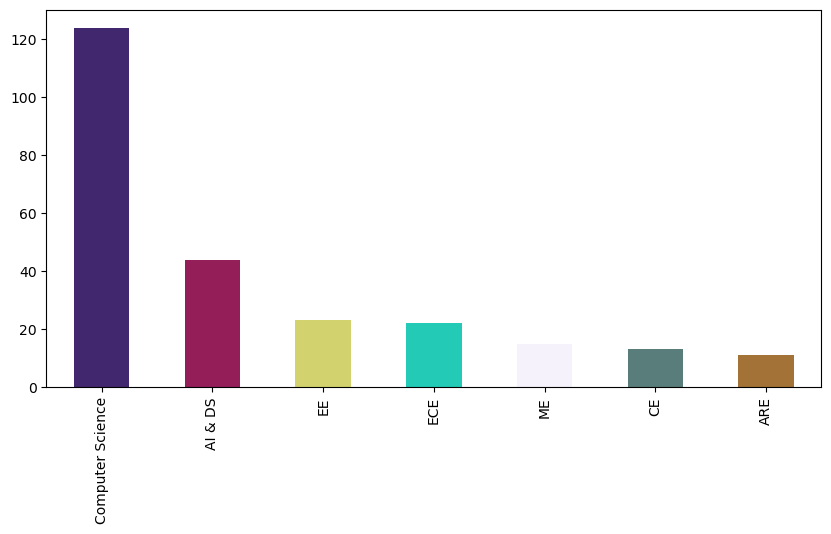

In [48]:
df['Please fill your branch?'].value_counts()[:7].plot(kind="bar", color=[get_color() for i in range(7)]) 

***
**From above we analysed that mostly students appeared for the quiz belong to Computer Science branch followed by Artifical Intelligence and Data science**
***

In [49]:
#Top scorers were from which branch?
df[["Please fill your full name?","Total points","Please fill your branch?"]].sort_values(by="Total points", ascending= False)[:5]

,Please fill your full name?,Total points,Please fill your branch?
170,dhiraj kumar kushwaha,58,Computer Science
219,himanshu soni,58,EE
255,ujjwal singh,58,ECE
68,yash balod,56,AI & DS
89,kartik verma,56,AI & DS


***
**From above we can see that the highest number that was 58 were of the students belonging to computer science, Electrical and Electronics branch**

***

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259 entries, 0 to 279
Data columns (total 71 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           259 non-null    int64         
 1   Start time                   259 non-null    datetime64[ns]
 2   Completion time              259 non-null    datetime64[ns]
 3   Total points                 259 non-null    int64         
 4   Quiz feedback                0 non-null      float64       
 5   Please fill your full name?  259 non-null    object        
 6   Please fill your email?      258 non-null    object        
 7   Please choose your batch?    258 non-null    object        
 8   Please fill your branch?     258 non-null    object        
 9   Q 1                          256 non-null    object        
 10  Points 1                     259 non-null    int64         
 11  Q 2                          257 non-null    

In [51]:
df[["Start time","Completion time"]]

,Start time,Completion time
0,2021-07-02 21:51:56,2021-07-02 21:52:13
1,2021-07-03 14:13:47,2021-07-03 14:18:16
2,2021-07-03 14:18:11,2021-07-03 14:23:05
3,2021-07-03 14:19:02,2021-07-03 14:23:40
4,2021-07-03 14:14:44,2021-07-03 14:26:08
...,...,...
274,2021-07-03 17:10:00,2021-07-03 17:14:43
276,2021-07-03 16:20:43,2021-07-03 17:17:03
277,2021-07-03 16:49:17,2021-07-03 17:19:23
278,2021-07-03 17:15:25,2021-07-03 17:30:20


In [52]:
#Time taken by the top scorers to complete the quiz
df["Time Difference"] = df["Completion time"] - df["Start time"]

In [53]:
df[df["Total points"] == df["Total points"].max()]["Time Difference"]

170   01:18:23
219   01:38:00
255   02:08:36
Name: Time Difference, dtype: timedelta64[ns]

***
**From above we found out that the time taken by the top scorers was 1 hour 18 minutes, one took 1 hours 38 minutes and the one took 2 hour 8 minutes to complete the quiz.**

***

In [55]:
df.sort_values(by="Total points", ascending = False)[:30][["Total points","Please fill your full name?","Time Difference"]]

,Total points,Please fill your full name?,Time Difference
170,58,dhiraj kumar kushwaha,01:18:23
219,58,himanshu soni,01:38:00
255,58,ujjwal singh,02:08:36
68,56,yash balod,00:15:07
89,56,kartik verma,00:49:26
70,55,paplavi makode,00:04:17
248,55,pratham mucchala,00:05:17
231,54,blesson jacob sunil,00:31:17
146,53,nihit malviya,00:08:34
182,53,samiksha kabra,00:04:41


***
**From above we can see that there were many who scored too high marks in just a period of 2-3 minutes and honestly saying its next to impossible to score such marks, for example gaurav singh nimoda scored 48 marks in just 2 minutes.**

***